# Usage (details: policy measures)
Here, we will analyse the relationship of policy measures and parameter values of SIR-derived ODE models. Policy measures are tracked by [Oxford Covid-19 Government Response Tracker (OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker).

## Preparation

In [1]:
# Standard users
# !pip install covsirphy
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [2]:
from pprint import pprint

In [3]:
import covsirphy as cs
cs.__version__

'2.8.0'

In [4]:
# Standard users and developers
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=False)
# Population in each country
population_data = data_loader.population(verbose=False)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=False)
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

## Class for policy measure analysis
We will `PolicyMeasures` class to find relationship of policy measures and parameter values of SIR-derived ODE models.

In [5]:
# Create analyser with tau value 360 [min] (can be changed)
analyser = cs.PolicyMeasures(jhu_data, population_data, oxcgrt_data, tau=360)
# The number of registerd countries
len(analyser.countries)

184

In [6]:
# We can get Scenario instance for detailed scenario analysis
type(analyser.scenario("Japan"))

covsirphy.analysis.scenario.Scenario

## Set phases with S-R trend analysis
We will perform S-R trend analysis to set phases in all countries. Countries which do not have **9th phases** will be un-registered for the next analysis. This number will be adjusted for your analysis.

In [7]:
# Show the number of phases of all countries
analyser.trend()
pprint(analyser.phase_len(), compact=True)

{

2

: 

['Dominica', 'Belize', 'Gambia', 'Papua New Guinea', 'Namibia']

,
 

3

: 

[

'Bahamas'

, 

'Grenada'

, 

'Antigua and Barbuda'

, 

'Mauritius'

, 

'Guyana'

,
     

'Angola'

, 

'Zimbabwe'

, 

'Brunei'

, 

'Tanzania'

]

,
 

4

: 

[

'Kyrgyzstan'

, 

'Lesotho'

, 

'Sao Tome and Principe'

, 

'Seychelles'

, 

'Morocco'

,
     

'Trinidad and Tobago'

, 

'Vietnam'

, 

'Malta'

, 

'Yemen'

, 

'Eritrea'

,
     

'Equatorial Guinea'

, 

'Palestine'

, 

'Zambia'

, 

'Iceland'

, 

'Norway'

,
     

'New Zealand'

, 

'Botswana'

, 

'Lebanon'

, 

'Fiji'

, 

'Montenegro'

, 

'Ireland'

,
     

'South Sudan'

]

,
 

5

: 

[

'Paraguay'

, 

'Saint Vincent and the Grenadines'

, 

'Venezuela'

, 

'Saint Lucia'

,
     

'Madagascar'

, 

'Netherlands'

, 

'Malawi'

, 

'Kazakhstan'

, 

'Ethiopia'

,
     

'Mongolia'

, 

'Israel'

, 

'Philippines'

, 

'Costa Rica'

, 

'Liechtenstein'

,
     

'Japan'

, 

'Central African Republic'

, 

'Chad'

, 

'San Marino'

, 

'Australia'

,
     

'Guatemala'

, 

'Spain'

, 

'Suriname'

, 

'Libya'

, 

'Syria'

]

,
 

6

: 

[

'India'

, 

'Nepal'

, 

'South Africa'

, 

'Cambodia'

, 

'Afghanistan'

, 

'Thailand'

,
     

'Cyprus'

, 

'Benin'

, 

'Greece'

, 

'Taiwan'

, 

'Guinea-Bissau'

, 

'Uzbekistan'

,
     

'Tajikistan'

, 

'Sri Lanka'

, 

'Colombia'

, 

'El Salvador'

, 

'Rwanda'

, 

'Niger'

,
     

'Slovakia'

, 

'Congo'

, 

'Ecuador'

, 

'Kosovo'

, 

'Croatia'

, 

'Andorra'

, 

'Cuba'

,
     

'Mozambique'

, 

'Swaziland'

, 

'Kenya'

, 

'Maldives'

, 

'Comoros'

, 

'Gabon'

, 

'Oman'

,
     

'Qatar'

, 

'Bermuda'

, 

'Somalia'

, 

'Cameroon'

]

,
 

7

: 

[

'Iraq'

, 

'Barbados'

, 

'Bulgaria'

, 

'Luxembourg'

, 

'Uganda'

, 

'Mauritania'

,
     

'Sudan'

, 

'Argentina'

, 

'Algeria'

, 

'Djibouti'

, 

'Jamaica'

, 

'Uruguay'

,
     

'Bosnia and Herzegovina'

, 

'Serbia'

, 

'Bolivia'

, 

'Jordan'

, 

'Ghana'

,
     

'Pakistan'

, 

'Slovenia'

, 

'China'

, 

'Sierra Leone'

, 

'Nicaragua'

, 

'Panama'

,
     

'Haiti'

, 

'Burkina Faso'

, 

'Albania'

, 

'Armenia'

, 

'Finland'

, 

'Latvia'

,
     

'Canada'

, 

'Azerbaijan'

, 

'Germany'

, 

'Tunisia'

, 

'Togo'

, 

'Burundi'

,
     

'Bhutan'

]

,
 

8

: 

[

'Denmark'

, 

'Malaysia'

, 

'Hungary'

, 

'Singapore'

, 

'Macedonia'

, 

'Saudi Arabia'

,
     

'Liberia'

, 

'Belgium'

, 

'Estonia'

, 

'Belarus'

, 

'Peru'

, 

'Nigeria'

,
     

'Czech Republic'

, 

'Mali'

, 

'Egypt'

, 

'Bangladesh'

, 

'Dominican Republic'

,
     

'Switzerland'

, 

'Cape Verde'

, 

'Ukraine'

, 

'Monaco'

, 

'Romania'

, 

'Lithuania'

,
     

'Brazil'

, 

'Honduras'

, 

'Indonesia'

, 

'Chile'

, 

'Austria'

]

,
 

9

: 

[

'Turkey'

, 

'Myanmar'

, 

'Georgia'

, 

'Mexico'

, 

'Russia'

, 

'Moldova'

, 

'Kuwait'

,
     

'United States'

, 

'France'

, 

'Portugal'

, 

'Italy'

]

,
 

10

: 

[

'Korea, South'

, 

'Guinea'

, 

'United Arab Emirates'

, 

'Iran'

, 

'Senegal'

,
      

'Bahrain'

]

,
 

11

: 

['Poland']

}

In [8]:
# Set phases with S-R trend analysis
analyser.trend(min_len=9)
# The number of countries
len(analyser.countries)

18

In [9]:
phase_len_dict = analyser.phase_len()
pprint(phase_len_dict, compact=True)

{

9

: 

[

'Turkey'

, 

'Myanmar'

, 

'Georgia'

, 

'Mexico'

, 

'Russia'

, 

'Moldova'

, 

'Kuwait'

,
     

'United States'

, 

'France'

, 

'Portugal'

, 

'Italy'

]

,
 

10

: 

[

'Korea, South'

, 

'Guinea'

, 

'United Arab Emirates'

, 

'Iran'

, 

'Senegal'

,
      

'Bahrain'

]

,
 

11

: 

['Poland']

}

In [10]:
# Here, only show the countries which have the most phases
countries_show = max(phase_len_dict.items(), key=lambda x: x[0])[1]
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population
Country Phase                                        
Poland  1st    Past  24Apr2020  09May2020    37974750
        2nd    Past  10May2020  21May2020    37974750
        3rd    Past  22May2020  05Jun2020    37974750
        4th    Past  06Jun2020  15Jun2020    37974750
        5th    Past  16Jun2020  30Jun2020    37974750
        6th    Past  01Jul2020  12Jul2020    37974750
        7th    Past  13Jul2020  24Jul2020    37974750
        8th    Past  25Jul2020  03Aug2020    37974750
        9th    Past  04Aug2020  11Aug2020    37974750
        10th   Past  12Aug2020  19Aug2020    37974750
        11th   Past  20Aug2020  28Aug2020    37974750

## Parameter estimation
we will estimate the parameter values with SIR-derived ODE models in each country.

In [11]:
# Parameter estimation with SIR-F model
analyser.estimate(cs.SIRF)


<SIR-F model: parameter estimation>

Running optimization with 4 CPUs...

	MDA,  8th phase (10Aug2020 - 18Aug2020): finished  915 trials in 0 min 25 sec

	TUR,  4th phase (29May2020 - 12Jun2020): finished  263 trials in 0 min 10 sec

	GEO,  3rd phase (14May2020 - 29May2020): finished 1607 trials in 1 min  0 sec

	MMR,  2nd phase (17May2020 - 25May2020): finished 1584 trials in 1 min  0 sec

	TUR,  1st phase (18Apr2020 - 29Apr2020): finished 1610 trials in 1 min  0 sec

	ARE,  3rd phase (26May2020 - 03Jun2020): finished 1016 trials in 0 min 35 sec

	TUR,  9th phase (13Aug2020 - 28Aug2020): finished  501 trials in 0 min 15 sec

	IRN, 10th phase (12Aug2020 - 28Aug2020): finished  535 trials in 0 min 15 sec

	GIN,  8th phase (24Jul2020 - 05Aug2020): finished  403 trials in 0 min 10 sec

	POL,  6th phase (01Jul2020 - 12Jul2020): finished  207 trials in 0 min  5 sec

	POL,  4th phase (06Jun2020 - 15Jun2020): finished 1097 trials in 0 min 35 sec

	GIN,  9th phase (06Aug2020 - 15Aug2020): finished  207 trials in 0 min  5 sec

	PRT,  8th phase (24Jul2020 - 09Aug2020): finished  534 trials in 0 min 15 sec

	MEX,  3rd phase (20Jun2020 - 30Jun2020): finished 1699 trials in 1 min  0 sec

	FRA,  9th phase (09Aug2020 - 28Aug2020): finished  864 trials in 0 min 25 sec

	MEX,  7th phase (29Jul2020 - 05Aug2020): finished 1657 trials in 1 min  0 sec

	GIN,  2nd phase (12May2020 - 22May2020): finished 1627 trials in 1 min  0 sec

	PRT,  2nd phase (18May2020 - 30May2020): finished 1424 trials in 1 min  0 sec

	GEO,  2nd phase (25Apr2020 - 13May2020): finished 1444 trials in 1 min  0 sec

	MEX,  1st phase (21May2020 - 07Jun2020): finished  165 trials in 0 min  5 sec

	BHR,  6th phase (07Jul2020 - 15Jul2020): finished 1456 trials in 1 min  0 sec

	IRN,  9th phase (29Jul2020 - 11Aug2020): finished  208 trials in 0 min  5 sec

	SEN,  1st phase (02May2020 - 14May2020): finished 1567 trials in 1 min  0 sec

	PRT,  1st phase (04May2020 - 17May2020): finished 1671 trials in 1 min  0 sec

	RUS,  8th phase (03Aug2020 - 13Aug2020): finished 1719 trials in 1 min  0 sec

	SEN,  2nd phase (15May2020 - 28May2020): finished 1129 trials in 0 min 35 sec

	MMR,  8th phase (28Jul2020 - 15Aug2020): finished  376 trials in 0 min 10 sec

	KOR,  4th phase (08May2020 - 23May2020): finished  209 trials in 0 min  5 sec

	RUS,  7th phase (22Jul2020 - 02Aug2020): finished 1705 trials in 1 min  0 sec

	IRN,  2nd phase (17Apr2020 - 10May2020): finished  206 trials in 0 min  5 sec

	POL, 11th phase (20Aug2020 - 28Aug2020): finished  205 trials in 0 min  5 sec

	KWT,  9th phase (15Aug2020 - 28Aug2020): finished 1354 trials in 0 min 45 sec

	KWT,  2nd phase (25May2020 - 09Jun2020): finished 1734 trials in 1 min  0 sec

	ITA,  2nd phase (01Apr2020 - 11Apr2020): finished 1044 trials in 0 min 35 sec

	MEX,  4th phase (01Jul2020 - 08Jul2020): finished  319 trials in 0 min 10 sec

	ARE,  9th phase (26Jul2020 - 12Aug2020): finished  992 trials in 0 min 35 sec

	ARE,  6th phase (23Jun2020 - 02Jul2020): finished  577 trials in 0 min 20 sec

	KOR,  1st phase (15Mar2020 - 25Mar2020): finished 1538 trials in 1 min  0 sec

	TUR,  7th phase (12Jul2020 - 28Jul2020): finished  139 trials in 0 min  5 sec

	SEN,  8th phase (21Jul2020 - 02Aug2020): finished 1434 trials in 1 min  0 sec

	POL,  8th phase (25Jul2020 - 03Aug2020): finished  857 trials in 0 min 30 sec

	MDA,  4th phase (26Jun2020 - 08Jul2020): finished 1422 trials in 1 min  0 sec

	MMR,  6th phase (28Jun2020 - 09Jul2020): finished  245 trials in 0 min 10 sec

	RUS,  6th phase (12Jul2020 - 21Jul2020): finished 1353 trials in 1 min  0 sec

	POL, 10th phase (12Aug2020 - 19Aug2020): finished  203 trials in 0 min 10 sec

	ITA,  8th phase (13Jun2020 - 27Jul2020): finished  579 trials in 0 min 25 sec

	MDA,  6th phase (21Jul2020 - 30Jul2020): finished  967 trials in 0 min 45 sec

	MDA,  2nd phase (03Jun2020 - 15Jun2020): finished 1208 trials in 1 min  0 sec

	RUS,  9th phase (14Aug2020 - 28Aug2020): finished 1276 trials in 1 min  0 sec

	GIN,  6th phase (02Jul2020 - 13Jul2020): finished 1215 trials in 1 min  0 sec

	RUS,  1st phase (08May2020 - 22May2020): finished 1208 trials in 1 min  0 sec

	GEO,  9th phase (17Aug2020 - 28Aug2020): finished 1234 trials in 1 min  0 sec

	IRN,  6th phase (23Jun2020 - 04Jul2020): finished  160 trials in 0 min  5 sec

	USA,  6th phase (16Jul2020 - 23Jul2020): finished  162 trials in 0 min  5 sec

	RUS,  3rd phase (06Jun2020 - 20Jun2020): finished 1263 trials in 1 min  0 sec

	KOR,  3rd phase (07Apr2020 - 07May2020): finished 1138 trials in 0 min 45 sec

	POL,  1st phase (24Apr2020 - 09May2020): finished 1414 trials in 1 min  0 sec

	USA,  5th phase (08Jul2020 - 15Jul2020): finished  439 trials in 0 min 15 sec

	PRT,  9th phase (10Aug2020 - 28Aug2020): finished 1405 trials in 1 min  0 sec

	MMR,  7th phase (10Jul2020 - 27Jul2020): finished 1358 trials in 1 min  0 sec

	ARE,  2nd phase (13May2020 - 25May2020): finished 1312 trials in 1 min  0 sec

	FRA,  2nd phase (03Apr2020 - 11Apr2020): finished 1299 trials in 1 min  0 sec

	MEX,  5th phase (09Jul2020 - 16Jul2020): finished 1272 trials in 1 min  0 sec

	ITA,  7th phase (22May2020 - 12Jun2020): finished  285 trials in 0 min 10 sec

	ITA,  3rd phase (12Apr2020 - 20Apr2020): finished  166 trials in 0 min  5 sec

	BHR,  1st phase (06May2020 - 30May2020): finished 1347 trials in 1 min  0 sec

	KWT,  5th phase (04Jul2020 - 13Jul2020): finished  325 trials in 0 min 10 sec

	BHR,  5th phase (29Jun2020 - 06Jul2020): finished 1444 trials in 1 min  0 sec

	BHR,  7th phase (16Jul2020 - 25Jul2020): finished  164 trials in 0 min  5 sec

	BHR,  3rd phase (11Jun2020 - 20Jun2020): finished  774 trials in 0 min 25 sec

	KWT,  8th phase (05Aug2020 - 14Aug2020): finished  346 trials in 0 min 10 sec

	MMR,  4th phase (07Jun2020 - 17Jun2020): finished 1465 trials in 1 min  0 sec

	PRT,  4th phase (13Jun2020 - 22Jun2020): finished  483 trials in 0 min 15 sec

	USA,  8th phase (08Aug2020 - 16Aug2020): finished  654 trials in 0 min 20 sec

	GEO,  6th phase (06Jul2020 - 19Jul2020): finished 1526 trials in 1 min  0 sec

	KOR,  7th phase (04Jul2020 - 20Jul2020): finished 1733 trials in 1 min  0 sec

	MEX,  6th phase (17Jul2020 - 28Jul2020): finished 1701 trials in 1 min  0 sec

	ARE,  7th phase (03Jul2020 - 10Jul2020): finished 1704 trials in 1 min  0 sec

	GEO,  8th phase (06Aug2020 - 16Aug2020): finished 1754 trials in 1 min  0 sec

	KWT,  4th phase (23Jun2020 - 03Jul2020): finished 1677 trials in 1 min  0 sec

	IRN,  1st phase (29Mar2020 - 16Apr2020): finished 1713 trials in 1 min  0 sec

	TUR,  5th phase (13Jun2020 - 26Jun2020): finished 1712 trials in 1 min  0 sec

	MDA,  9th phase (19Aug2020 - 28Aug2020): finished  384 trials in 0 min 10 sec

	GEO,  7th phase (20Jul2020 - 05Aug2020): finished 1710 trials in 1 min  0 sec

	BHR,  8th phase (26Jul2020 - 05Aug2020): finished  184 trials in 0 min  5 sec

	FRA,  7th phase (25Jun2020 - 19Jul2020): finished  539 trials in 0 min 15 sec

	ITA,  5th phase (01May2020 - 09May2020): finished  578 trials in 0 min 15 sec

	POL,  7th phase (13Jul2020 - 24Jul2020): finished  230 trials in 0 min  5 sec

	KWT,  3rd phase (10Jun2020 - 22Jun2020): finished  789 trials in 0 min 20 sec

	FRA,  8th phase (20Jul2020 - 08Aug2020): finished 1823 trials in 1 min  0 sec

	GEO,  4th phase (30May2020 - 11Jun2020): finished 1979 trials in 1 min  0 sec

	KWT,  1st phase (12May2020 - 24May2020): finished 2026 trials in 1 min  0 sec

	GEO,  1st phase (12Apr2020 - 24Apr2020): finished 2028 trials in 1 min  0 sec

	POL,  5th phase (16Jun2020 - 30Jun2020): finished  252 trials in 0 min  5 sec

	POL,  3rd phase (22May2020 - 05Jun2020): finished  474 trials in 0 min 10 sec

	MMR,  1st phase (29Apr2020 - 16May2020): finished 2018 trials in 1 min  0 sec

	USA,  2nd phase (12May2020 - 06Jun2020): finished 1993 trials in 1 min  0 sec

	SEN,  6th phase (01Jul2020 - 09Jul2020): finished 1892 trials in 0 min 55 sec

	IRN,  7th phase (05Jul2020 - 16Jul2020): finished  256 trials in 0 min  5 sec

	KOR,  8th phase (21Jul2020 - 03Aug2020): finished 1999 trials in 1 min  0 sec

	BHR,  2nd phase (31May2020 - 10Jun2020): finished 2014 trials in 1 min  0 sec

	MDA,  5th phase (09Jul2020 - 20Jul2020): finished  473 trials in 0 min 10 sec

	POL,  9th phase (04Aug2020 - 11Aug2020): finished  445 trials in 0 min 10 sec

	TUR,  3rd phase (16May2020 - 28May2020): finished  214 trials in 0 min  5 sec

	SEN,  7th phase (10Jul2020 - 20Jul2020): finished  396 trials in 0 min 10 sec

	ITA,  1st phase (23Mar2020 - 31Mar2020): finished 1925 trials in 1 min  0 sec

	MMR,  5th phase (18Jun2020 - 27Jun2020): finished  394 trials in 0 min 10 sec

	FRA,  4th phase (25Apr2020 - 05May2020): finished 1880 trials in 1 min  0 sec

	PRT,  7th phase (11Jul2020 - 23Jul2020): finished  156 trials in 0 min  5 sec

	TUR,  6th phase (27Jun2020 - 11Jul2020): finished  359 trials in 0 min 10 sec

	ARE,  4th phase (04Jun2020 - 11Jun2020): finished  956 trials in 0 min 30 sec

	ITA,  4th phase (21Apr2020 - 30Apr2020): finished  255 trials in 0 min  5 sec

	KOR,  2nd phase (26Mar2020 - 06Apr2020): finished  476 trials in 0 min 10 sec

	TUR,  8th phase (29Jul2020 - 12Aug2020): finished  481 trials in 0 min 10 sec

	FRA,  5th phase (06May2020 - 27May2020): finished  452 trials in 0 min 10 sec

	MMR,  3rd phase (26May2020 - 06Jun2020): finished 1939 trials in 1 min  0 sec

	RUS,  5th phase (01Jul2020 - 11Jul2020): finished 2012 trials in 1 min  0 sec

	MDA,  1st phase (09May2020 - 02Jun2020): finished 2000 trials in 1 min  0 sec

	MDA,  3rd phase (16Jun2020 - 25Jun2020): finished  476 trials in 0 min 10 sec

	KOR,  6th phase (18Jun2020 - 03Jul2020): finished 2030 trials in 1 min  0 sec

	TUR,  2nd phase (30Apr2020 - 15May2020): finished  473 trials in 0 min 10 sec

	GIN,  1st phase (02May2020 - 11May2020): finished 2027 trials in 1 min  0 sec

	GEO,  5th phase (12Jun2020 - 05Jul2020): finished 2011 trials in 1 min  0 sec

	PRT,  3rd phase (31May2020 - 12Jun2020): finished 1035 trials in 0 min 25 sec

	RUS,  2nd phase (23May2020 - 05Jun2020): finished 2012 trials in 1 min  0 sec

	KWT,  7th phase (24Jul2020 - 04Aug2020): finished  255 trials in 0 min  5 sec

	GIN,  4th phase (31May2020 - 14Jun2020): finished 2001 trials in 1 min  0 sec

	KOR,  5th phase (24May2020 - 17Jun2020): finished 1024 trials in 0 min 25 sec

	ARE,  8th phase (11Jul2020 - 25Jul2020): finished  254 trials in 0 min  5 sec

	KOR,  9th phase (04Aug2020 - 17Aug2020): finished 2009 trials in 1 min  0 sec

	BHR,  4th phase (21Jun2020 - 28Jun2020): finished 2017 trials in 1 min  0 sec

	MEX,  2nd phase (08Jun2020 - 19Jun2020): finished  873 trials in 0 min 20 sec

	SEN,  4th phase (10Jun2020 - 18Jun2020): finished 1045 trials in 0 min 25 sec

	SEN,  3rd phase (29May2020 - 09Jun2020): finished 2032 trials in 1 min  0 sec

	POL,  2nd phase (10May2020 - 21May2020): finished  476 trials in 0 min 10 sec

	USA,  1st phase (20Apr2020 - 11May2020): finished 2004 trials in 1 min  0 sec

	GIN,  3rd phase (23May2020 - 30May2020): finished 1928 trials in 1 min  0 sec

	GIN,  7th phase (14Jul2020 - 23Jul2020): finished 1839 trials in 1 min  0 sec

	MMR,  9th phase (16Aug2020 - 28Aug2020): finished 1766 trials in 1 min  0 sec

	IRN,  3rd phase (11May2020 - 28May2020): finished 1721 trials in 1 min  0 sec

	ARE,  1st phase (27Apr2020 - 12May2020): finished 1767 trials in 1 min  0 sec

	IRN,  4th phase (29May2020 - 10Jun2020): finished 1783 trials in 1 min  0 sec

	SEN,  5th phase (19Jun2020 - 30Jun2020): finished  968 trials in 0 min 30 sec

	GIN,  5th phase (15Jun2020 - 01Jul2020): finished 1725 trials in 1 min  0 sec

	KOR, 10th phase (18Aug2020 - 28Aug2020): finished 1749 trials in 1 min  0 sec

	RUS,  4th phase (21Jun2020 - 30Jun2020): finished 1794 trials in 1 min  0 sec

	ARE,  5th phase (12Jun2020 - 22Jun2020): finished 1057 trials in 0 min 30 sec

	MDA,  7th phase (31Jul2020 - 09Aug2020): finished 1766 trials in 0 min 55 sec

	FRA,  1st phase (25Mar2020 - 02Apr2020): finished 1930 trials in 1 min  0 sec

	ITA,  9th phase (28Jul2020 - 28Aug2020): finished 1948 trials in 1 min  0 sec

	USA,  3rd phase (07Jun2020 - 25Jun2020): finished 1936 trials in 1 min  0 sec

	FRA,  6th phase (28May2020 - 24Jun2020): finished  996 trials in 0 min 25 sec

	IRN,  5th phase (11Jun2020 - 22Jun2020): finished  254 trials in 0 min  5 sec

	USA,  4th phase (26Jun2020 - 07Jul2020): finished 1984 trials in 1 min  0 sec

	USA,  7th phase (24Jul2020 - 07Aug2020): finished  254 trials in 0 min  5 sec

Completed optimization. Total: 26 min 37 sec

In [12]:
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population    ODE    Rt     theta  \
Country Phase                                                                  
Poland  1st    Past  24Apr2020  09May2020    37974750  SIR-F  1.26  0.000105   
        2nd    Past  10May2020  21May2020    37974750  SIR-F  1.38  0.036383   
        3rd    Past  22May2020  05Jun2020    37974750  SIR-F  1.29  0.001014   
        4th    Past  06Jun2020  15Jun2020    37974750  SIR-F  2.24  0.020620   
        5th    Past  16Jun2020  30Jun2020    37974750  SIR-F  0.53  0.000441   
        6th    Past  01Jul2020  12Jul2020    37974750  SIR-F  0.53  0.020697   
        7th    Past  13Jul2020  24Jul2020    37974750  SIR-F  0.89  0.003266   
        8th    Past  25Jul2020  03Aug2020    37974750  SIR-F  1.86  0.017772   
        9th    Past  04Aug2020  11Aug2020    37974750  SIR-F  2.26  0.000685   
        10th   Past  12Aug2020  19Aug2020    37974750  SIR-F  1.87  0.002884   
        11th   Past  20Aug2020  28Aug2020    37974750  SIR-F  1.44  0.001384   

                  kappa       rho     sigma  tau  1/beta [day]  \
Country Phase                                                    
Poland  1st    0.000569  0.008421  0.006121  360            29   
        2nd    0.000084  0.009422  0.006486  360            26   
        3rd    0.000215  0.007468  0.005565  360            33   
        4th    0.000092  0.007750  0.003293  360            32   
        5th    0.000229  0.005389  0.010014  360            46   
        6th    0.000071  0.006917  0.012778  360            36   
        7th    0.000192  0.011331  0.012472  360            22   
        8th    0.000002  0.014823  0.007836  360            16   
        9th    0.000235  0.013416  0.005698  360            18   
        10th   0.000079  0.012155  0.006389  360            20   
        11th   0.000150  0.011401  0.007780  360            21   

               1/alpha2 [day]  1/gamma [day]  alpha1 [-]     RMSLE  Trials  \
Country Phase                                                                
Poland  1st               439             40       0.000  0.036211    1414   
        2nd              2965             38       0.036  0.016293     476   
        3rd              1161             44       0.001  0.021443     474   
        4th              2727             75       0.021  0.013414    1097   
        5th              1093             24       0.000  0.064214     252   
        6th              3515             19       0.021  0.033314     207   
        7th              1304             20       0.003  0.036757     230   
        8th            103449             31       0.018  0.008487     857   
        9th              1064             43       0.001  0.006037     445   
        10th             3152             39       0.003  0.008373     203   
        11th             1663             32       0.001  0.007689     205   

                    Runtime  
Country Phase                
Poland  1st    1 min  0 sec  
        2nd    0 min 10 sec  
        3rd    0 min 10 sec  
        4th    0 min 35 sec  
        5th    0 min  5 sec  
        6th    0 min  5 sec  
        7th    0 min  5 sec  
        8th    0 min 30 sec  
        9th    0 min 10 sec  
        10th   0 min 10 sec  
        11th   0 min  5 sec

## Compare the history of parameters
Here, compare the history of parameter values if countries.

In [13]:
# All parameter/day parameter/Rt/OxCGRT
analyser.track().head()

,Date,Country,theta,kappa,rho,sigma,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],...,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
0,2020-03-15,"Korea, South",0.000172927,0.000164328,0.0035558,0.0116591,0,1521,70,21,...,2,2,0,1,1,3,2,3,2,55.56
1,2020-03-16,"Korea, South",0.000172927,0.000164328,0.0035558,0.0116591,0,1521,70,21,...,2,2,0,1,1,3,2,3,2,55.56
2,2020-03-17,"Korea, South",0.000172927,0.000164328,0.0035558,0.0116591,0,1521,70,21,...,2,2,0,1,1,3,2,3,2,55.56
3,2020-03-18,"Korea, South",0.000172927,0.000164328,0.0035558,0.0116591,0,1521,70,21,...,2,2,0,1,1,3,2,3,2,55.56
4,2020-03-19,"Korea, South",0.000172927,0.000164328,0.0035558,0.0116591,0,1521,70,21,...,2,2,0,1,1,3,2,3,2,55.56


### $Rt$: Reprodcution number $\mathrm{[-]}$

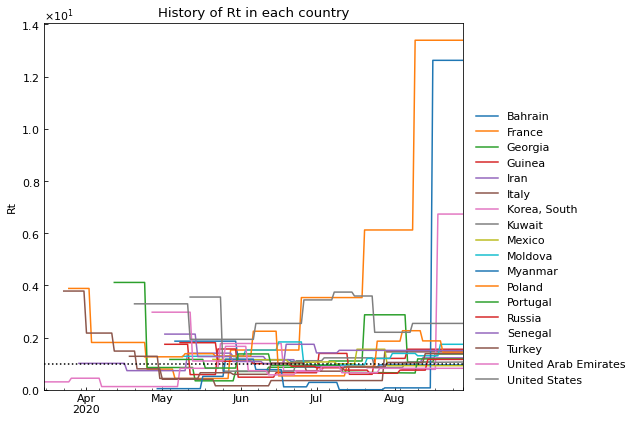

Country,Bahrain,France,Georgia,Guinea,Iran,Italy,"Korea, South",Kuwait,Mexico,Moldova,Myanmar,Poland,Portugal,Russia,Senegal,Turkey,United Arab Emirates,United States
Date,,,,,,,,,,,,,,,,,,
2020-08-24,0.95,13.39,1.37,1.55,1.22,1.45,6.73,1.06,0.92,1.74,12.62,1.44,1.18,1.16,1.5,1.38,0.82,2.54
2020-08-25,0.95,13.39,1.37,1.55,1.22,1.45,6.73,1.06,0.92,1.74,12.62,1.44,1.18,1.16,1.5,1.38,0.82,2.54
2020-08-26,0.95,13.39,1.37,1.55,1.22,1.45,6.73,1.06,0.92,1.74,12.62,1.44,1.18,1.16,1.5,1.38,0.82,2.54
2020-08-27,0.95,13.39,1.37,1.55,1.22,1.45,6.73,1.06,0.92,1.74,12.62,1.44,1.18,1.16,1.5,1.38,0.82,2.54
2020-08-28,0.95,13.39,1.37,1.55,1.22,1.45,6.73,1.06,0.92,1.74,12.62,1.44,1.18,1.16,1.5,1.38,0.82,2.54


In [14]:
analyser.param_history("Rt", roll_window=None).tail()

### $\rho$: Effective contact rate $\mathrm{[-]}$

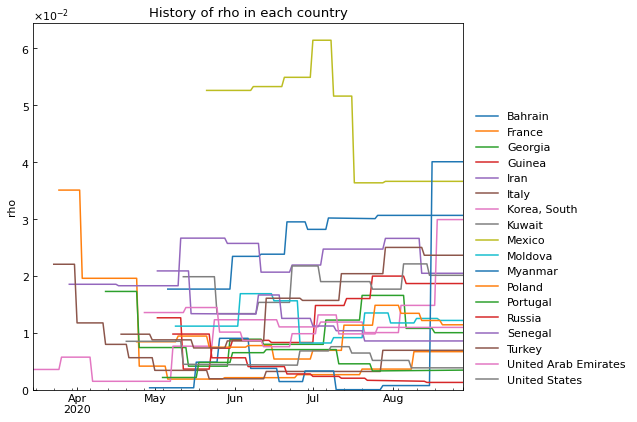

Country,Bahrain,France,Georgia,Guinea,Iran,Italy,"Korea, South",Kuwait,Mexico,Moldova,Myanmar,Poland,Portugal,Russia,Senegal,Turkey,United Arab Emirates,United States
Date,,,,,,,,,,,,,,,,,,
2020-08-24,0.03062,0.006679,0.010016,0.018648,0.02045,0.00692,0.02988,0.020094,0.036597,0.012168,0.040039,0.011401,0.003441,0.001278,0.008562,0.023616,0.010943,0.003841
2020-08-25,0.03062,0.006679,0.010016,0.018648,0.02045,0.00692,0.02988,0.020094,0.036597,0.012168,0.040039,0.011401,0.003441,0.001278,0.008562,0.023616,0.010943,0.003841
2020-08-26,0.03062,0.006679,0.010016,0.018648,0.02045,0.00692,0.02988,0.020094,0.036597,0.012168,0.040039,0.011401,0.003441,0.001278,0.008562,0.023616,0.010943,0.003841
2020-08-27,0.03062,0.006679,0.010016,0.018648,0.02045,0.00692,0.02988,0.020094,0.036597,0.012168,0.040039,0.011401,0.003441,0.001278,0.008562,0.023616,0.010943,0.003841
2020-08-28,0.03062,0.006679,0.010016,0.018648,0.02045,0.00692,0.02988,0.020094,0.036597,0.012168,0.040039,0.011401,0.003441,0.001278,0.008562,0.023616,0.010943,0.003841


In [15]:
analyser.param_history("rho", roll_window=None).tail()

### $\sigma$: Recovery rate $\mathrm{[-]}$

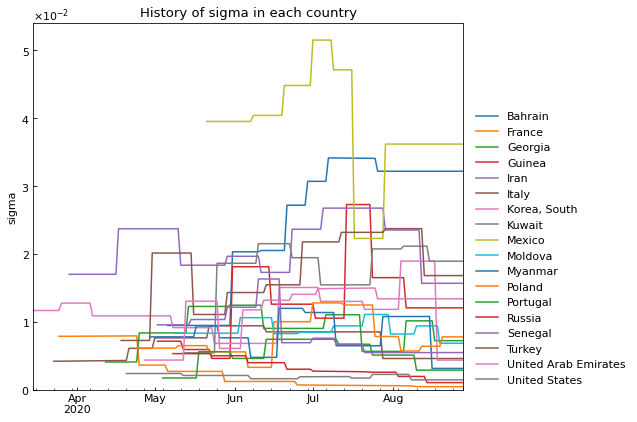

Country,Bahrain,France,Georgia,Guinea,Iran,Italy,"Korea, South",Kuwait,Mexico,Moldova,Myanmar,Poland,Portugal,Russia,Senegal,Turkey,United Arab Emirates,United States
Date,,,,,,,,,,,,,,,,,,
2020-08-24,0.032166,0.000452,0.007214,0.012044,0.015666,0.004592,0.004359,0.01892,0.036165,0.00684,0.003134,0.00778,0.002878,0.001047,0.005464,0.016799,0.013385,0.00145
2020-08-25,0.032166,0.000452,0.007214,0.012044,0.015666,0.004592,0.004359,0.01892,0.036165,0.00684,0.003134,0.00778,0.002878,0.001047,0.005464,0.016799,0.013385,0.00145
2020-08-26,0.032166,0.000452,0.007214,0.012044,0.015666,0.004592,0.004359,0.01892,0.036165,0.00684,0.003134,0.00778,0.002878,0.001047,0.005464,0.016799,0.013385,0.00145
2020-08-27,0.032166,0.000452,0.007214,0.012044,0.015666,0.004592,0.004359,0.01892,0.036165,0.00684,0.003134,0.00778,0.002878,0.001047,0.005464,0.016799,0.013385,0.00145
2020-08-28,0.032166,0.000452,0.007214,0.012044,0.015666,0.004592,0.004359,0.01892,0.036165,0.00684,0.003134,0.00778,0.002878,0.001047,0.005464,0.016799,0.013385,0.00145


In [16]:
analyser.param_history("sigma", roll_window=None).tail()

### $\kappa$: Mortality rate of infected cases $\mathrm{[-]}$

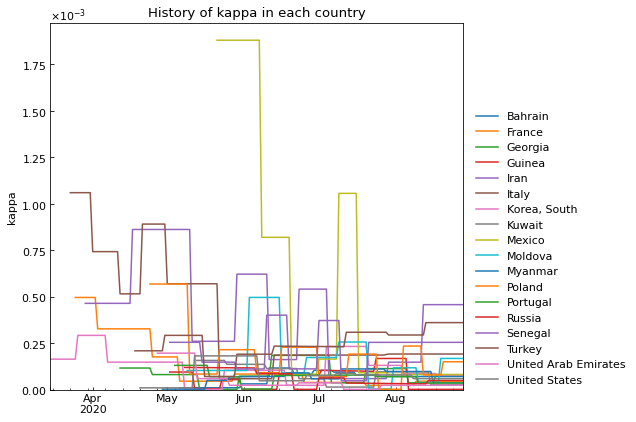

Country,Bahrain,France,Georgia,Guinea,Iran,Italy,"Korea, South",Kuwait,Mexico,Moldova,Myanmar,Poland,Portugal,Russia,Senegal,Turkey,United Arab Emirates,United States
Date,,,,,,,,,,,,,,,,,,
2020-08-24,0.000071,0.000046,0.000079,0.000002,0.000458,0.000192,0.000079,0.000026,0.000082,0.000168,0.000037,0.00015,0.000036,0.00005,0.000255,0.000361,0.000024,0.00006
2020-08-25,0.000071,0.000046,0.000079,0.000002,0.000458,0.000192,0.000079,0.000026,0.000082,0.000168,0.000037,0.00015,0.000036,0.00005,0.000255,0.000361,0.000024,0.00006
2020-08-26,0.000071,0.000046,0.000079,0.000002,0.000458,0.000192,0.000079,0.000026,0.000082,0.000168,0.000037,0.00015,0.000036,0.00005,0.000255,0.000361,0.000024,0.00006
2020-08-27,0.000071,0.000046,0.000079,0.000002,0.000458,0.000192,0.000079,0.000026,0.000082,0.000168,0.000037,0.00015,0.000036,0.00005,0.000255,0.000361,0.000024,0.00006
2020-08-28,0.000071,0.000046,0.000079,0.000002,0.000458,0.000192,0.000079,0.000026,0.000082,0.000168,0.000037,0.00015,0.000036,0.00005,0.000255,0.000361,0.000024,0.00006


In [17]:
analyser.param_history("kappa", roll_window=None).tail()

### $\theta$: Mortality rate of S$^\ast$ cases $\mathrm{[-]}$

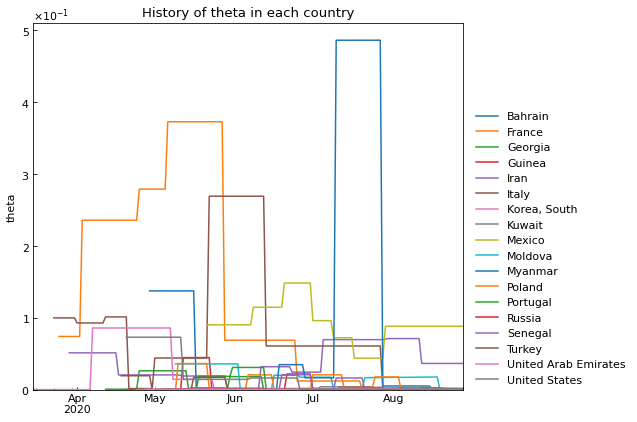

Country,Bahrain,France,Georgia,Guinea,Iran,Italy,"Korea, South",Kuwait,Mexico,Moldova,Myanmar,Poland,Portugal,Russia,Senegal,Turkey,United Arab Emirates,United States
Date,,,,,,,,,,,,,,,,,,
2020-08-24,0.000892,0.001255,0.000346,0.001401,0.036565,0.000619,0.000343,0.001091,0.088318,0.000132,0.000659,0.001384,0.001858,0.001247,0.000472,0.000423,0.000985,0.00124
2020-08-25,0.000892,0.001255,0.000346,0.001401,0.036565,0.000619,0.000343,0.001091,0.088318,0.000132,0.000659,0.001384,0.001858,0.001247,0.000472,0.000423,0.000985,0.00124
2020-08-26,0.000892,0.001255,0.000346,0.001401,0.036565,0.000619,0.000343,0.001091,0.088318,0.000132,0.000659,0.001384,0.001858,0.001247,0.000472,0.000423,0.000985,0.00124
2020-08-27,0.000892,0.001255,0.000346,0.001401,0.036565,0.000619,0.000343,0.001091,0.088318,0.000132,0.000659,0.001384,0.001858,0.001247,0.000472,0.000423,0.000985,0.00124
2020-08-28,0.000892,0.001255,0.000346,0.001401,0.036565,0.000619,0.000343,0.001091,0.088318,0.000132,0.000659,0.001384,0.001858,0.001247,0.000472,0.000423,0.000985,0.00124


In [18]:
analyser.param_history("theta", roll_window=None).tail()

## (Experimental): Relationship of OxCGRT index and parameter values
Government responses will impact on parameter values of ODE models about 14 days later. Here, we will investigate on the relationship of [stringency index (from OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker/blob/master/documentation/index_methodology.md) and reproduction number/model parameters.


In [19]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [20]:
df = analyser.track()
param_cols = ["Rt", *cs.SIRF.PARAMETERS]
oxcgrt_cols = oxcgrt_data.OXCGRT_VARS[:]
cols = param_cols + oxcgrt_cols
delay = 14

for col in param_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")
    df[col] = df.groupby("Country")[col].shift(0 - delay)

df = df.dropna(how="any")
df = df.loc[:, ["Date", "Country", *cols]]
track_df = df.copy()
track_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26112 entries, 0 to 26349
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Date                                 26112 non-null  datetime64[ns]
 1   Country                              26112 non-null  object        
 2   Rt                                   26112 non-null  float64       
 3   theta                                26112 non-null  float64       
 4   kappa                                26112 non-null  float64       
 5   rho                                  26112 non-null  float64       
 6   sigma                                26112 non-null  float64       
 7   School_closing                       26112 non-null  int64         
 8   Workplace_closing                    26112 non-null  int64         
 9   Cancel_events                        26112 non-null  int64         
 10  Gatherings

In [21]:
# Correlation
df = track_df.copy()
df.corr().style.background_gradient(axis=None)

,Rt,theta,kappa,rho,sigma,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
Rt,1.000000,-0.159358,-0.075645,0.183447,-0.285308,-0.337788,-0.070266,0.024594,0.209442,-0.164446,-0.092868,-0.025416,-0.216066,0.025942,-0.150150,-0.277735,-0.157545
theta,-0.159358,1.000000,0.147737,0.122271,0.171057,0.125300,0.300683,0.036438,-0.234853,-0.066898,-0.084945,-0.030205,0.014805,0.016203,-0.573400,-0.121763,0.259198
kappa,-0.075645,0.147737,1.000000,0.441885,0.311536,0.267215,0.236593,-0.000917,-0.114522,0.067573,0.087136,-0.083440,0.082096,-0.096335,-0.407168,0.058784,0.348305
rho,0.183447,0.122271,0.441885,1.000000,0.624371,0.270699,0.199687,-0.121803,-0.074399,0.063776,0.118693,0.001958,0.189671,-0.123574,-0.359827,-0.223641,0.282355
sigma,-0.285308,0.171057,0.311536,0.624371,1.000000,0.279336,-0.056070,-0.160547,-0.492376,-0.131617,-0.073780,-0.279201,0.129179,-0.166501,-0.331265,0.141769,0.045584
School_closing,-0.337788,0.125300,0.267215,0.270699,0.279336,1.000000,0.497418,0.036486,-0.151467,0.302286,0.196261,0.136305,0.569938,-0.037070,0.042794,-0.417497,0.532948
Workplace_closing,-0.070266,0.300683,0.236593,0.199687,-0.056070,0.497418,1.000000,0.126402,0.257686,0.548157,0.476511,0.482453,0.276885,0.003532,-0.066681,-0.488405,0.721655
Cancel_events,0.024594,0.036438,-0.000917,-0.121803,-0.160547,0.036486,0.126402,1.000000,0.228233,0.136891,0.213888,0.211178,0.014652,-0.006814,0.026321,-0.074265,0.228005
Gatherings_restrictions,0.209442,-0.234853,-0.114522,-0.074399,-0.492376,-0.151467,0.257686,0.228233,1.000000,0.555961,0.449120,0.620776,0.121497,0.087346,0.324186,-0.208936,0.422868
Transport_closing,-0.164446,-0.066898,0.067573,0.063776,-0.131617,0.302286,0.548157,0.136891,0.555961,1.000000,0.561702,0.791754,0.321095,-0.115129,0.275508,-0.258136,0.717413


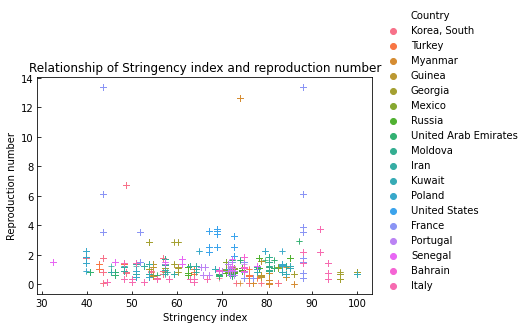

In [22]:
# Scatter plot of Stringency index and Rt
df = track_df.copy()
sns.scatterplot(data=df, x="Stringency_index", y="Rt", hue="Country", legend="brief", marker="+")
bbox_to_anchor=(1.02, 0)
bbox_loc="lower left"
plt.legend(bbox_to_anchor=bbox_to_anchor, loc=bbox_loc, borderaxespad=0)
plt.title("Relationship of Stringency index and reproduction number")
plt.ylabel("Reproduction number")
plt.xlabel("Stringency index")
plt.show()